# **Detekcija Prevara kod Transakcija Kreditnim Karticama**





### Analiza izvedbe modela s fokusom na Neuravnoteženim Klasama

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [5]:
%cd

/content/drive/MyDrive/UUI_Projekt_MargaretaPribudic


In [7]:
data = pd.read_csv("creditcard.csv")

In [8]:
data.head()

,Vrijeme,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Kolicina,Klasa
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#data = data.sample(frac = 0.1, random_state = 42)

data.shape

(284807, 31)

In [10]:
data.describe()

,Vrijeme,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Kolicina,Klasa
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.804747e-12,-6.644481e-13,-5.733476e-13,7.602684e-13,2.290382e-13,6.119060e-14,3.241792e-14,-5.131360e-13,-7.735175e-13,...,-1.365215e-12,-7.572798e-13,-1.814482e-13,1.067890e-12,-6.013363e-13,-1.204946e-13,2.643612e-12,-3.222971e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.dtypes

,0
Vrijeme,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


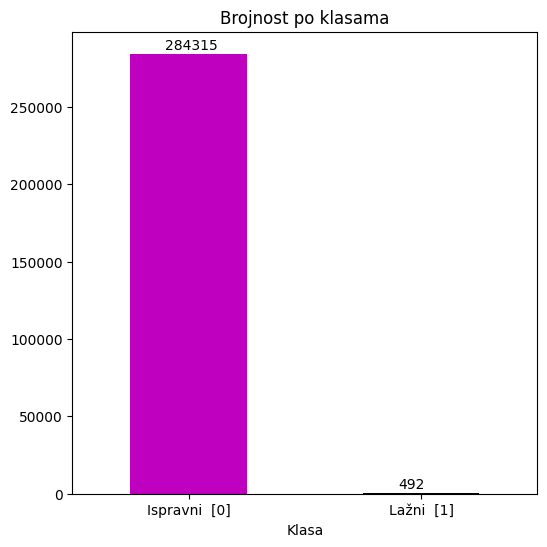

In [12]:
diff_class = data['Klasa'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(6, 6))
plt.xticks(range(2), ['Ispravni  [0]', 'Lažni  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Brojnost po klasama')
plt.show()

In [13]:
lazni = data[data['Klasa'] == 1]
ispravni = data[data['Klasa'] == 0]
outlierFraction = len(lazni)/float(len(ispravni))
print(outlierFraction)
print('Broj slučaja prevare: {}'.format(len(data[data['Klasa'] == 1])))
print('Broj ispravnih transakcija: {}'.format(len(data[data['Klasa'] == 0])))

0.0017304750013189597
Broj slučaja prevare: 492
Broj ispravnih transakcija: 284315


In [14]:
print('Slučajevi prevare')
lazni.Kolicina.describe()

Slučajevi prevare


,Kolicina
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
print('Ispravne transakcije')
ispravni.Kolicina.describe()

Ispravne transakcije


,Kolicina
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


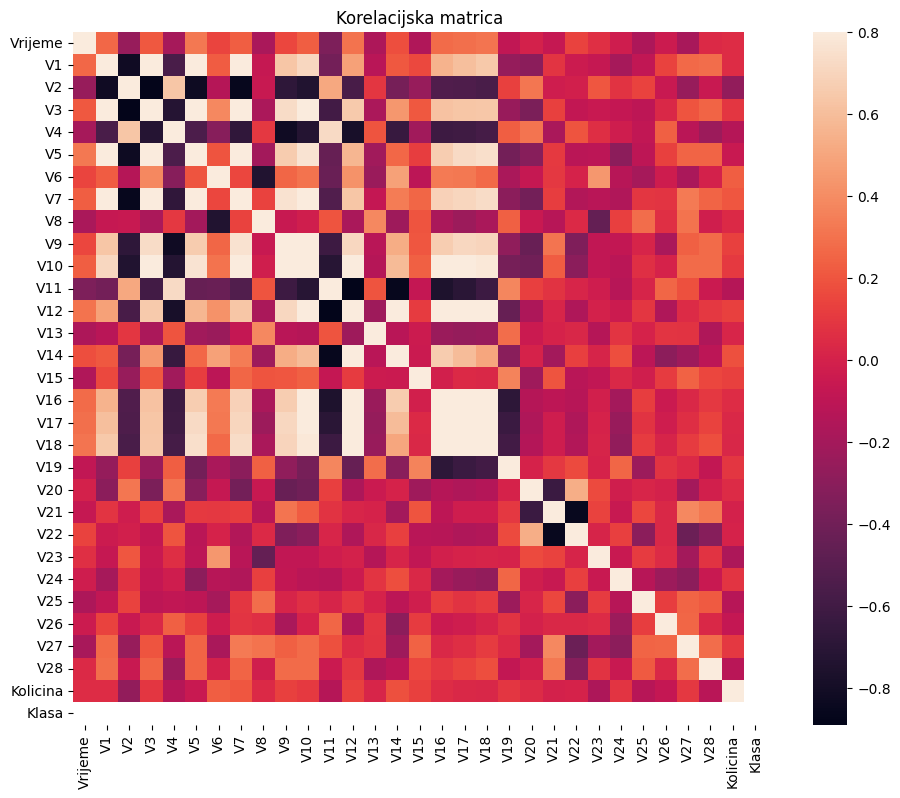

In [16]:
corrmat = lazni.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.title('Korelacijska matrica')
plt.show()

In [17]:
X = data.drop(['Klasa'], axis = 1)
Y = data['Klasa']
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

yPred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(lazni)
n_errors = (yPred != y_test).sum()
print("Model korišten u klasifikaciji Slučajne šume")

acc = accuracy_score(y_test, yPred)
print("Točnost je {}".format(acc))

prec = precision_score(y_test, yPred)
print("Preciznost je {}".format(prec))

rec = recall_score(y_test, yPred)
print("Odziv je {}".format(rec))

f1 = f1_score(y_test, yPred)
print("F1: {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("MCC: {}".format(MCC))

Model korišten u klasifikaciji Slučajne šume
Točnost je 0.9996137776061234
Preciznost je 0.9871794871794872
Odziv je 0.7857142857142857
F1: 0.875
MCC: 0.8805302991855358


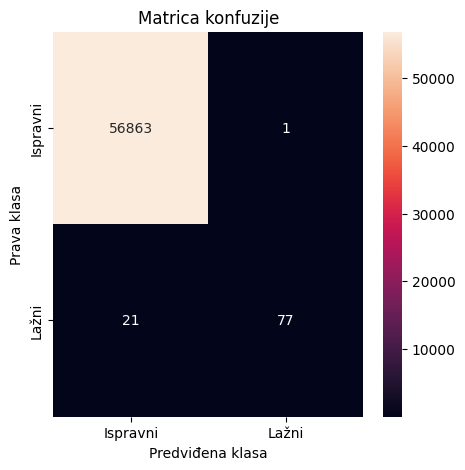

In [21]:
LABELS = ['Ispravni', 'Lažni']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Matrica konfuzije")
plt.ylabel('Prava klasa')
plt.xlabel('Predviđena klasa')
plt.show()

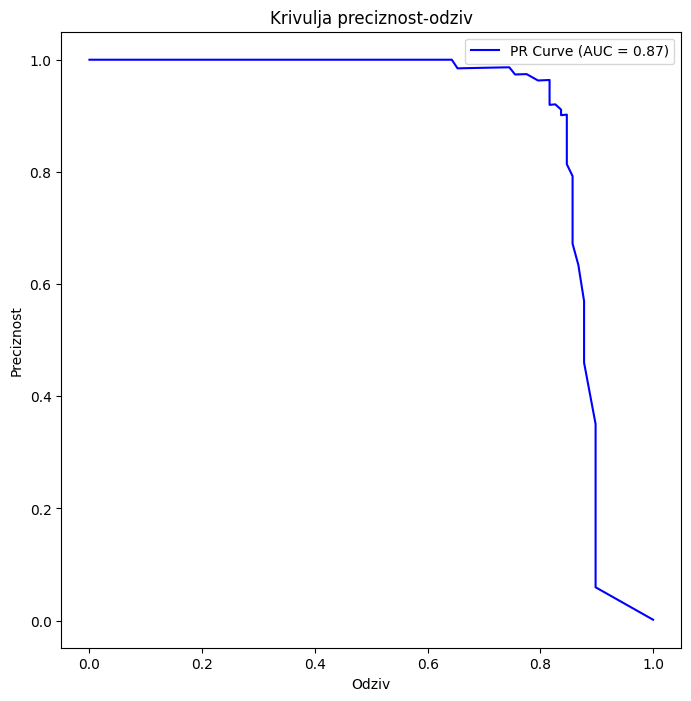

In [22]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

auc_prc = auc(recall, precision)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='blue', label='PR Curve (AUC = {:.2f})'.format(auc_prc))
plt.xlabel('Odziv')
plt.ylabel('Preciznost')
plt.title('Krivulja preciznost-odziv')
plt.legend(loc='best')
plt.show()


In [23]:
print("Površina ispod grafa preciznost-odziv(AUC-PRC): {}".format(auc_prc))

Površina ispod grafa preciznost-odziv(AUC-PRC): 0.8731375922424577


In [ ]:
from sklearn.metrics import log_loss, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_loss = log_loss(y_train, model.predict_proba(X_train)[:, 1])
test_loss = log_loss(y_test, model.predict_proba(X_test)[:, 1])

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Točnost na skupu za treniranje: {}".format(train_accuracy))
print("Gubitak na skupu za treniranje: {}".format(train_loss))

print("Točnost na skupu za testiranje: {}".format(test_accuracy))
print("Gubitak na skupu za testiranje: {}".format(test_loss))

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(['Treniranje', 'Testiranje'], [train_loss, test_loss], color=['blue', 'orange'])
plt.title('Gubitak')

plt.subplot(1, 2, 2)
plt.bar(['Treniranje', 'Testiranje'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Točnost')

plt.show()